In [ ]:
# https://www.kaggle.com/lewisgmorris/warehouse-picking-times

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/pick data.csv')
df.head()

C:\Users\thiag\anaconda3\envs\dataviz\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,PH_DOC,PH_SORDER,PH_DELIVER,PH_PICKEDB,PH_PICKSTA,PH_PICKEND,PH_TOTALLI,PH_TOTALBO,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,0,DOC299034,ORD26934,NaN,PAUL,23/02/2015 12:25:47,23/02/2015 12:25:51,2,1,NaN,NaN,NaN,NaN
1,1,DOC298740,ORD26652,NaN,PAUL,23/02/2015 13:48:03,23/02/2015 13:48:05,1,1,NaN,NaN,NaN,NaN
2,2,DOC299079,ORD26977,NaN,PAUL,23/02/2015 14:18:13,23/02/2015 14:18:14,2,1,NaN,NaN,NaN,NaN
3,3,DOC299086,ORD26983,NaN,PAUL,23/02/2015 14:27:52,23/02/2015 14:29:55,2,1,NaN,NaN,NaN,NaN
4,4,DOC299400,ORD27271,NaN,LEWIS,26/02/2015 11:38:22,26/02/2015 11:39:27,3,1,NaN,NaN,NaN,NaN


In [4]:
cols = ['PH_SORDER', 'PH_PICKEDB', 'PH_PICKSTA', 
        'PH_PICKEND', 'PH_TOTALLI', 'PH_TOTALBO']

df = pd.read_csv('../data/pick data.csv', usecols=cols)
df.head()

,PH_SORDER,PH_PICKEDB,PH_PICKSTA,PH_PICKEND,PH_TOTALLI,PH_TOTALBO
0,ORD26934,PAUL,23/02/2015 12:25:47,23/02/2015 12:25:51,2,1
1,ORD26652,PAUL,23/02/2015 13:48:03,23/02/2015 13:48:05,1,1
2,ORD26977,PAUL,23/02/2015 14:18:13,23/02/2015 14:18:14,2,1
3,ORD26983,PAUL,23/02/2015 14:27:52,23/02/2015 14:29:55,2,1
4,ORD27271,LEWIS,26/02/2015 11:38:22,26/02/2015 11:39:27,3,1


In [5]:
# Convert strings to datetime
df['PH_PICKSTA'] = pd.to_datetime(df.PH_PICKSTA, format='%d/%m/%Y %H:%M:%S')
df['PH_PICKEND'] = pd.to_datetime(df.PH_PICKEND, format='%d/%m/%Y %H:%M:%S')

# create colunms for date(day/month/year), year, month, week, and weekday name
df['DATE'] = df.PH_PICKEND.dt.date
df['YEAR'] = df.PH_PICKEND.dt.year
df['MONTH'] = df.PH_PICKEND.dt.month
df['WEEK'] = df.PH_PICKEND.dt.week
df['DAY_OF_WEEK'] = df.PH_PICKEND.dt.day_name()

In [6]:
df_date = df.groupby('DATE')
df_date.describe()

PH_TOTALLI                                                     \
                count      mean        std  min   25%  50%    75%    max   
DATE                                                                       
2015-02-23        4.0  1.750000   0.500000  1.0  1.75  2.0   2.00    2.0   
2015-02-26        2.0  2.500000   0.707107  2.0  2.25  2.5   2.75    3.0   
2015-03-03        9.0  2.555556   1.509231  1.0  2.00  2.0   2.00    6.0   
2015-03-04       20.0  2.100000   0.307794  2.0  2.00  2.0   2.00    3.0   
2015-03-05       34.0  2.558824   1.185549  2.0  2.00  2.0   3.00    8.0   
...               ...       ...        ...  ...   ...  ...    ...    ...   
2020-02-03      152.0  9.131579  10.760908  2.0  2.00  5.0  12.00   68.0   
2020-02-04      127.0  7.433071   7.441401  2.0  2.00  4.0  10.00   37.0   
2020-02-05      164.0  8.573171  12.096271  2.0  2.75  4.0   9.25  107.0   
2020-02-06      108.0  9.814815  13.888170  1.0  3.00  5.0  10.25   93.0   
2020-02-07      128.0  5.828125   7.144305  1.0  2.00  3.0   6.00   46.0   

           PH_TOTALBO            ... MONTH        WEEK                         \
                count      mean  ...   75%  max  count  mean  std   min   25%   
DATE                             ...                                            
2015-02-23        4.0  1.000000  ...   2.0  2.0    4.0   9.0  0.0   9.0   9.0   
2015-02-26        2.0  1.000000  ...   2.0  2.0    2.0   9.0  0.0   9.0   9.0   
2015-03-03        9.0  0.888889  ...   3.0  3.0    9.0  10.0  0.0  10.0  10.0   
2015-03-04       20.0  1.000000  ...   3.0  3.0   20.0  10.0  0.0  10.0  10.0   
2015-03-05       34.0  1.000000  ...   3.0  3.0   34.0  10.0  0.0  10.0  10.0   
...               ...       ...  ...   ...  ...    ...   ...  ...   ...   ...   
2020-02-03      152.0  1.000000  ...   2.0  2.0  152.0   6.0  0.0   6.0   6.0   
2020-02-04      127.0  1.110236  ...   2.0  2.0  127.0   6.0  0.0   6.0   6.0   
2020-02-05      164.0  1.042683  ...   2.0  2.0  164.0   6.0  0.0   6.0   6.0   
2020-02-06      108.0  1.064815  ...   2.0  2.0  108.0   6.0  0.0   6.0   6.0   
2020-02-07      128.0  1.046875  ...   2.0  2.0  128.0   6.0  0.0   6.0   6.0   

                              
             50%   75%   max  
DATE                          
2015-02-23   9.0   9.0   9.0  
2015-02-26   9.0   9.0   9.0  
2015-03-03  10.0  10.0  10.0  
2015-03-04  10.0  10.0  10.0  
2015-03-05  10.0  10.0  10.0  
...          ...   ...   ...  
2020-02-03   6.0   6.0   6.0  
2020-02-04   6.0   6.0   6.0  
2020-02-05   6.0   6.0   6.0  
2020-02-06   6.0   6.0   6.0  
2020-02-07   6.0   6.0   6.0  

[1232 rows x 40 columns]

In [7]:
count_daily = df_date.count()['PH_SORDER']
count_daily

DATE
2015-02-23      4
2015-02-26      2
2015-03-03      9
2015-03-04     20
2015-03-05     34
             ... 
2020-02-03    152
2020-02-04    127
2020-02-05    164
2020-02-06    108
2020-02-07    128
Name: PH_SORDER, Length: 1232, dtype: int64

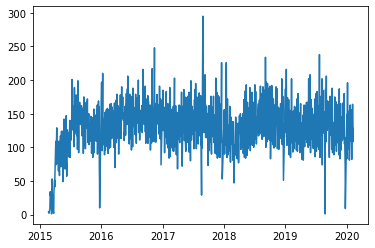

In [8]:
plt.plot(count_daily.index, count_daily.values)

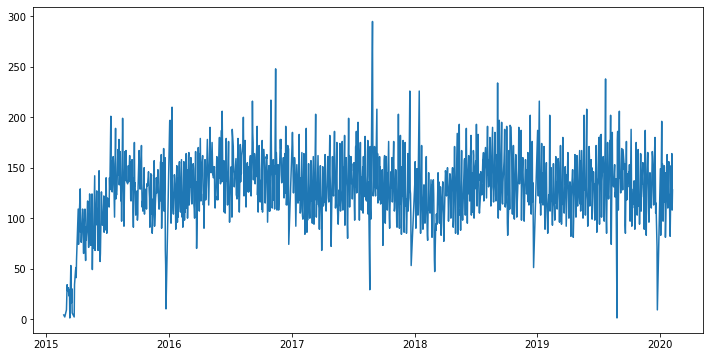

In [9]:
fig, ax = plt.subplots(1, figsize=(12,6))
plt.plot(count_daily.index, count_daily.values)
plt.show()

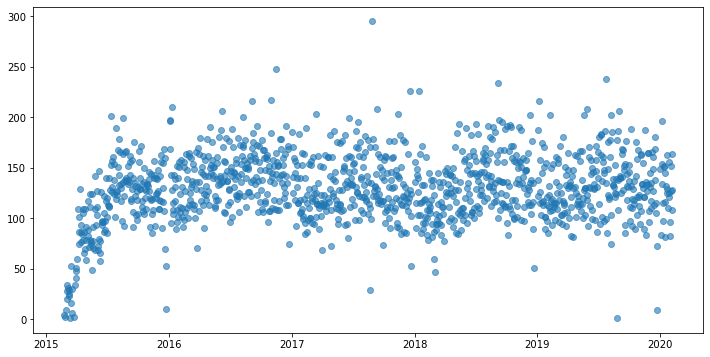

In [10]:
fig, ax = plt.subplots(1, figsize=(12,6))
plt.scatter(count_daily.index, count_daily.values, alpha=0.6)
plt.show()

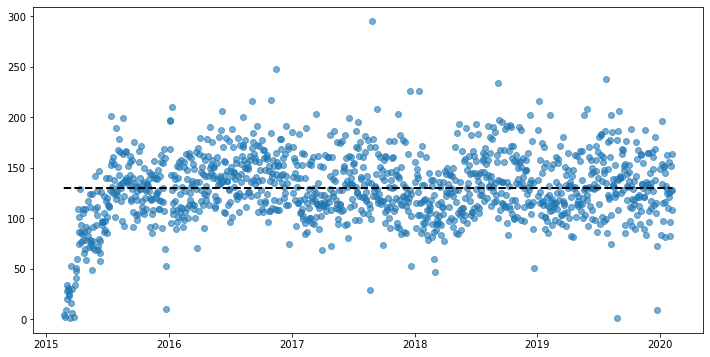

In [11]:
# Avarege daily dispatched orders
mean = df_date.count().PH_SORDER.mean()
# Average daily 
count_daily = df_date.count()['PH_SORDER']

# define figure
fig, ax = plt.subplots(1, figsize=(12,6))
# plot
plt.scatter(count_daily.index, count_daily.values, alpha=0.6)
plt.plot(count_daily.index, [mean]*len(count_daily), 
         color='black', linewidth=2, linestyle='--')

plt.show()

In [12]:
df_week = df.groupby(['YEAR', 'WEEK'])
df_week.describe()

PH_TOTALLI                                                    \
                 count       mean        std  min  25%  50%   75%    max   
YEAR   WEEK                                                                
2015.0 9.0         6.0   2.000000   0.632456  1.0  2.0  2.0   2.0    3.0   
       10.0       91.0   2.505495   1.369295  1.0  2.0  2.0   2.5   11.0   
       11.0      109.0   2.376147   0.869110  2.0  2.0  2.0   2.0    7.0   
       12.0      105.0   2.400000   0.861573  2.0  2.0  2.0   2.0    7.0   
       13.0       36.0   4.416667   5.743941  1.0  2.0  2.0   4.0   34.0   
...                ...        ...        ...  ...  ...  ...   ...    ...   
2020.0 2.0       696.0  10.004310  14.792910  2.0  2.0  5.0  11.0  156.0   
       3.0       645.0   9.548837  12.804048  2.0  2.0  4.0  11.0  115.0   
       4.0       659.0   8.535660  11.941722  1.0  2.0  4.0  10.0  100.0   
       5.0       580.0   8.837931  11.436750  1.0  2.0  5.0  10.0  103.0   
       6.0       679.0   8.164948  10.633581  1.0  2.0  4.0  10.0  107.0   

            PH_TOTALBO            ...             MONTH                      \
                 count      mean  ...  75%   max  count mean  std  min  25%   
YEAR   WEEK                       ...                                         
2015.0 9.0         6.0  1.000000  ...  1.0   1.0    6.0  2.0  0.0  2.0  2.0   
       10.0       91.0  0.989011  ...  1.0   1.0   91.0  3.0  0.0  3.0  3.0   
       11.0      109.0  1.000000  ...  1.0   1.0  109.0  3.0  0.0  3.0  3.0   
       12.0      105.0  1.000000  ...  1.0   1.0  105.0  3.0  0.0  3.0  3.0   
       13.0       36.0  0.944444  ...  1.0   1.0   36.0  3.0  0.0  3.0  3.0   
...                ...       ...  ...  ...   ...    ...  ...  ...  ...  ...   
2020.0 2.0       696.0  1.182471  ...  1.0  91.0  696.0  1.0  0.0  1.0  1.0   
       3.0       645.0  1.187597  ...  1.0  71.0  645.0  1.0  0.0  1.0  1.0   
       4.0       659.0  1.065250  ...  1.0  11.0  659.0  1.0  0.0  1.0  1.0   
       5.0       580.0  1.062069  ...  1.0   8.0  580.0  1.0  0.0  1.0  1.0   
       6.0       679.0  1.050074  ...  1.0   8.0  679.0  2.0  0.0  2.0  2.0   

                            
             50%  75%  max  
YEAR   WEEK                 
2015.0 9.0   2.0  2.0  2.0  
       10.0  3.0  3.0  3.0  
       11.0  3.0  3.0  3.0  
       12.0  3.0  3.0  3.0  
       13.0  3.0  3.0  3.0  
...          ...  ...  ...  
2020.0 2.0   1.0  1.0  1.0  
       3.0   1.0  1.0  1.0  
       4.0   1.0  1.0  1.0  
       5.0   1.0  1.0  1.0  
       6.0   2.0  2.0  2.0  

[255 rows x 24 columns]

In [13]:
count = df_week.count().PH_SORDER
count = count.unstack(level=0)

count.head()

YEAR,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
WEEK,,,,,,
1.0,NaN,800.0,622.0,497.0,447.0,232.0
2.0,NaN,665.0,672.0,661.0,718.0,696.0
3.0,NaN,619.0,654.0,693.0,665.0,645.0
4.0,NaN,597.0,652.0,605.0,613.0,659.0
5.0,NaN,648.0,628.0,566.0,571.0,580.0


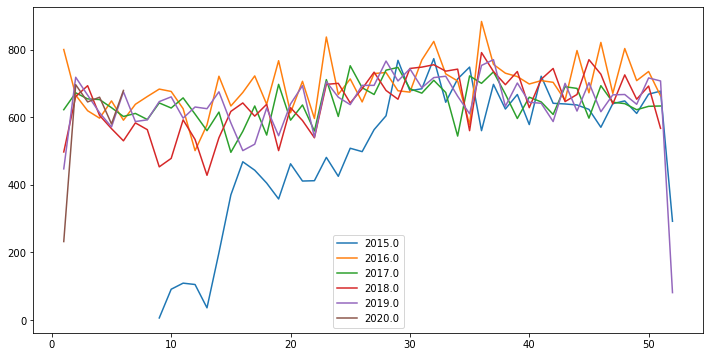

In [14]:
fig, ax = plt.subplots(1, figsize=(12,6))

for year in count.columns:
    plt.plot(count[year].index, count[year].values)
    
plt.legend(count.columns)

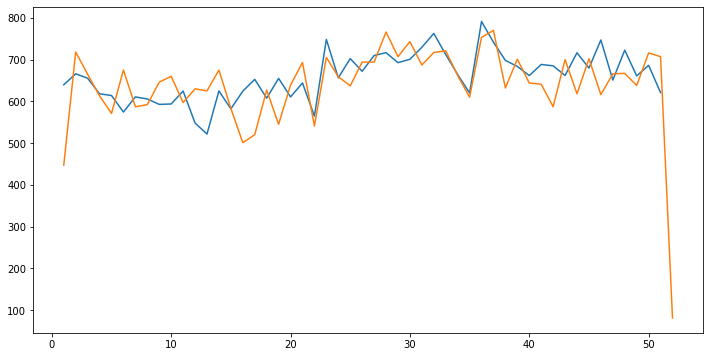

In [15]:
years = [2016,2017,2018]

fig, ax = plt.subplots(1, figsize=(12,6))

plt.plot(count.index, count[years].mean(axis=1))
plt.plot(count[2019].index, count[2019].values)

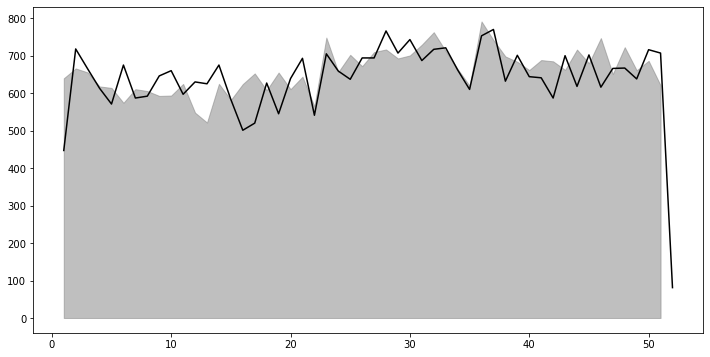

In [16]:
years = [2016,2017,2018]

fig, ax = plt.subplots(1, figsize=(12,6))

plt.fill_between(count.index, count[years].mean(axis=1), 
                 color='grey', alpha=0.5)

plt.plot(count[2019].index, count[2019].values, color='black')

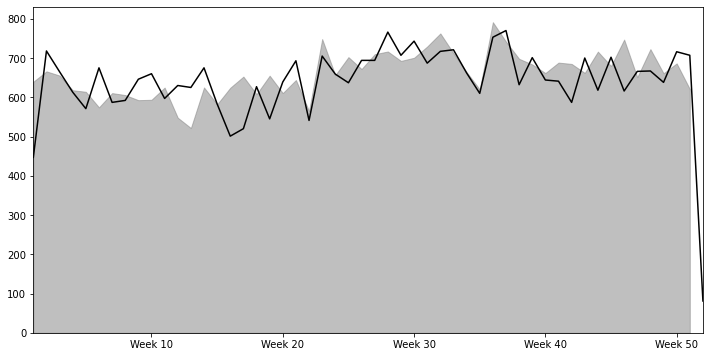

In [17]:
years = [2016,2017,2018]

fig, ax = plt.subplots(1, figsize=(12,6))

plt.fill_between(count.index, count[years].mean(axis=1), 
                 color='grey', alpha=0.5)

plt.plot(count[2019].index, count[2019].values, color='black')

xticks = plt.xticks()[0]
xticks_labels = ["Week {:.0f}".format(i) for i in xticks]
plt.xticks(xticks, labels=xticks_labels)

plt.xlim(1,count.index[-1])
plt.ylim(0,)

plt.show()

In [18]:
years = [2018]
count[years].mean(axis=1)

WEEK
1.0     497.0
2.0     661.0
3.0     693.0
4.0     605.0
5.0     566.0
6.0     530.0
7.0     583.0
8.0     563.0
9.0     453.0
10.0    478.0
11.0    592.0
12.0    534.0
13.0    428.0
14.0    539.0
15.0    617.0
16.0    642.0
17.0    603.0
18.0    638.0
19.0    501.0
20.0    628.0
21.0    590.0
22.0    539.0
23.0    697.0
24.0    700.0
25.0    642.0
26.0    684.0
27.0    733.0
28.0    679.0
29.0    653.0
30.0    744.0
31.0    748.0
32.0    755.0
33.0    736.0
34.0    742.0
35.0    560.0
36.0    791.0
37.0    735.0
38.0    696.0
39.0    735.0
40.0    628.0
41.0    712.0
42.0    744.0
43.0    646.0
44.0    667.0
45.0    770.0
46.0    727.0
47.0    639.0
48.0    725.0
49.0    653.0
50.0    692.0
51.0    567.0
52.0      NaN
dtype: float64

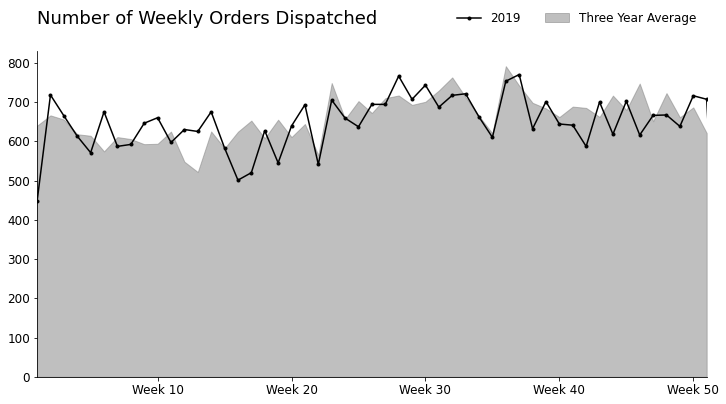

In [19]:
years = [2016,2017,2018]
fig, ax = plt.subplots(1, figsize=(12,6))

# Plot Average Area
plt.fill_between(count.index, count[years].mean(axis=1), 
                 color='grey', alpha=0.5)
# Plot 2019 line
plt.plot(count.index, count[2019].values, color='black', marker='.')

# Get xticks and build labels
xticks = plt.xticks()[0]
xticks_labels = ["Week {:.0f}".format(i) for i in xticks]

# adjust x and y ticks
plt.xticks(xticks, labels=xticks_labels, fontsize=12)
plt.yticks(fontsize=12)

# adjust limits
plt.xlim(1,count.index[-2])
plt.ylim(0,)

# plot legend
plt.legend(['2019', 'Three Year Average'], 
           fontsize=12, ncol=2, frameon=False,
           bbox_to_anchor=(0., 1.05, 1., .102))

# plot title
plt.title('Number of Weekly Orders Dispatched\n', 
          loc='left', fontsize=18)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('line_chart.png')

In [20]:
count[[2016,2017,2018,2019]].mean(axis=1)

WEEK
1.0     591.50
2.0     679.00
3.0     657.75
4.0     616.75
5.0     603.25
6.0     599.50
7.0     604.75
8.0     602.25
9.0     606.00
10.0    610.25
11.0    617.75
12.0    568.50
13.0    547.50
14.0    637.50
15.0    582.25
16.0    593.50
17.0    619.50
18.0    612.50
19.0    627.50
20.0    617.75
21.0    656.25
22.0    558.75
23.0    737.50
24.0    657.00
25.0    686.00
26.0    677.50
27.0    705.75
28.0    729.00
29.0    696.25
30.0    711.25
31.0    718.75
32.0    751.25
33.0    714.50
34.0    663.75
35.0    617.50
36.0    781.75
37.0    748.75
38.0    681.50
39.0    688.00
40.0    657.25
41.0    676.50
42.0    660.50
43.0    671.50
44.0    691.75
45.0    685.25
46.0    714.25
47.0    654.75
48.0    708.75
49.0    655.25
50.0    693.75
51.0    642.50
52.0     81.00
dtype: float64

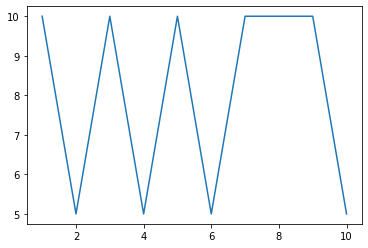

In [21]:
x = [1, 2, 3, 4, 5, 6, 7, 9, 10]
y = [10, 5, 10, 5, 10, 5, 10, 10, 5]

plt.plot(x,y)

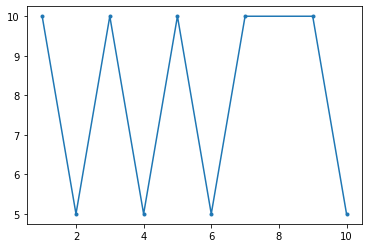

In [22]:
x = [1, 2, 3, 4, 5, 6, 7, 9, 10]
y = [10, 5, 10, 5, 10, 5, 10, 10, 5]

plt.plot(x,y, marker='.')